In [145]:
import pandas as pd

In [146]:
df = pd.read_csv('train.csv')

In [147]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
df = df.drop(['Ticket'],axis=1) 

In [151]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [152]:
df = df.drop(['Name','PassengerId','Cabin','Embarked'],axis=1) 

In [153]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [154]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [155]:
from sklearn.preprocessing import LabelEncoder

In [156]:
le = LabelEncoder()

In [157]:
df['Sex']  = le.fit_transform(df['Sex'])

In [158]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [159]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [160]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [161]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [162]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X = df.drop(['Survived'],axis=1)

In [165]:
y = df['Survived']

In [171]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
model = DecisionTreeClassifier()

In [174]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [175]:
y_pred = model.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score 

In [179]:
print('Score : ',accuracy_score(y_test,y_pred))

Score :  0.7653631284916201


In [180]:
from sklearn.metrics import classification_report
print('Report : ',classification_report(y_test,y_pred))

Report :                precision    recall  f1-score   support

           0       0.87      0.80      0.83       129
           1       0.57      0.68      0.62        50

    accuracy                           0.77       179
   macro avg       0.72      0.74      0.72       179
weighted avg       0.78      0.77      0.77       179



In [184]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [185]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))

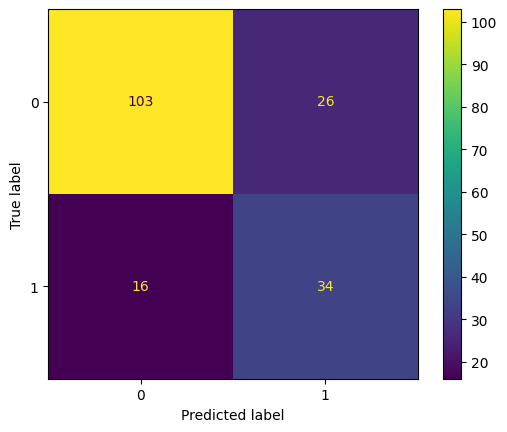

In [186]:
disp.plot()

In [187]:
import matplotlib.pyplot as plt 

In [188]:
plt.show()

In [189]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [190]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))

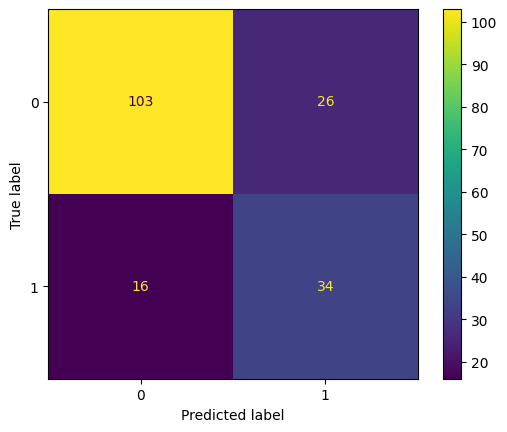

In [191]:
disp.plot()